In [1]:
# Libraries Used
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sea
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing and Exploring the Dataset
data = pd.read_csv('covid_19_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98252 entries, 0 to 98251
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              98252 non-null  int64  
 1   ObservationDate  98252 non-null  object 
 2   Province/State   67099 non-null  object 
 3   Country/Region   98252 non-null  object 
 4   Last Update      98252 non-null  object 
 5   Confirmed        98252 non-null  float64
 6   Deaths           98252 non-null  float64
 7   Recovered        98252 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.0+ MB


In [3]:
# Sampling out the Data from the Dataset
data.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
15926,15927,04/17/2020,NaN,Sweden,2020-04-17 23:38:48,13216.0,1400.0,550.0
56694,56695,07/04/2020,Risaralda,Colombia,2020-07-05 04:33:46,587.0,16.0,297.0
76668,76669,07/31/2020,Unknown,Netherlands,2020-08-01 04:36:27,511.0,18.0,0.0
42887,42888,06/15/2020,Smolensk Oblast,Russia,2020-06-16 04:33:09,3868.0,51.0,1469.0
61231,61232,07/11/2020,NaN,Belarus,2020-07-12 04:34:30,64767.0,459.0,54919.0


In [4]:
# Checking the Null values in the Dataset
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     31153
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [5]:
# Checking the Province/State Column
data['Province/State'].mode()

0    Unknown
Name: Province/State, dtype: object

In [6]:
# Replacing the NaN value in the Province/State Column with the 'Unknown' i.e. almost 31.75% of the given dataset
data['Province/State'] = data['Province/State'].fillna(data['Province/State'].mode()[0])
data.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
730,731,02/04/2020,Unknown,Germany,2020-02-03T20:53:02,12.0,0.0,0.0
10320,10321,03/30/2020,Recovered,Canada,3/8/20 5:31,0.0,0.0,466.0
34170,34171,06/03/2020,Florida,US,2020-06-04 02:33:14,58764.0,2566.0,0.0
9200,9201,03/27/2020,Unknown,Kosovo,2020-03-27 23:27:48,86.0,1.0,1.0
42102,42103,06/14/2020,Queensland,Australia,2020-06-15 03:33:14,1065.0,6.0,1051.0


In [7]:
# Changing the data type of the 'ObservationDate and Last Update' Column
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], errors = 'coerce', dayfirst = True)
data['Last Update'] = pd.to_datetime(data['Last Update'], errors = 'coerce', dayfirst = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98252 entries, 0 to 98251
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              98252 non-null  int64         
 1   ObservationDate  98252 non-null  datetime64[ns]
 2   Province/State   98252 non-null  object        
 3   Country/Region   98252 non-null  object        
 4   Last Update      98252 non-null  datetime64[ns]
 5   Confirmed        98252 non-null  float64       
 6   Deaths           98252 non-null  float64       
 7   Recovered        98252 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 6.0+ MB


In [8]:
# Exploring the DataFrame
data.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
16737,16738,2020-04-20,Unknown,Austria,2020-04-20 23:44:50,14795.0,470.0,10631.0
69926,69927,2020-07-22,Sichuan,Mainland China,2020-07-23 05:15:04,603.0,3.0,594.0
97090,97091,2020-08-28,Gifu,Japan,2020-08-29 04:28:19,551.0,9.0,499.0
50816,50817,2020-06-26,Oregon,US,2020-06-27 04:33:35,7818.0,202.0,0.0
54347,54348,2020-01-07,La Libertad,Peru,2020-07-02 04:33:46,10148.0,598.0,0.0


In [9]:
# Separating the Date and Hour from 'Last Update' Column into 2 separate column in the DataFrame
data['Last Update_Date'] = data['Last Update'].dt.date
data['Last Update_Hour'] = data['Last Update'].dt.hour
data['Last Update_Date'] = pd.to_datetime(data['Last Update_Date'], errors = 'coerce', dayfirst = True)

In [10]:
data.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Last Update_Date,Last Update_Hour
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,2020-01-22,17
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,2020-01-22,17
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,2020-01-22,17
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,2020-01-22,17
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,2020-01-22,17


In [11]:
# Total no. of Countries with Disease Spread
print('There are',data['Country/Region'].value_counts().count(),'Countries with Disease Spread')

There are 223 Countries with Disease Spread


In [12]:
# Total no. of Confirmed, Recovered, Deaths Cases around the world
print('There are',data['Confirmed'].sum(),'Confirmed Cases around the World')
print('There are',data['Recovered'].sum(),'Recovered Cases around the World')
print('There are',data['Deaths'].sum(),'Death Cases around the World')

There are 1517276871.0 Confirmed Cases around the World
There are 824611490.0 Recovered Cases around the World
There are 68039737.0 Death Cases around the World


In [13]:
# Total no. of Active and Closed Cases around the world
# active_cases = confirmed_cases - recovered_cases - death_cases
# closed_cases = recovered_cases + death_cases
active_cases = data['Confirmed'].sum() - data['Recovered'].sum() - data['Deaths'].sum()
closed_cases = data['Recovered'].sum() + data['Deaths'].sum()

print('There are',active_cases,'Active Cases around the World')
print('There are',closed_cases,'Closed Cases around the World')

There are 624625644.0 Active Cases around the World
There are 892651227.0 Closed Cases around the World


In [14]:
# Approx. no. of Confirmed Cases per Day around the world
confirm_per_day = data.groupby(data['Last Update_Date'])['Confirmed'].sum()
# confirm_per_day

In [15]:
# Approx. no. of Recovered Cases per Day around the world
recover_per_day = data.groupby(data['Last Update_Date'])['Recovered'].sum()
# recover_per_day

In [16]:
# Approx. no. of Deaths Cases per Day around the world
death_per_day = data.groupby(data['Last Update_Date'])['Deaths'].sum()
# death_per_day

Text(0.5, 1.0, 'Approx. No. of Confirmed, Recovered, and Death Cases per Day around the World')

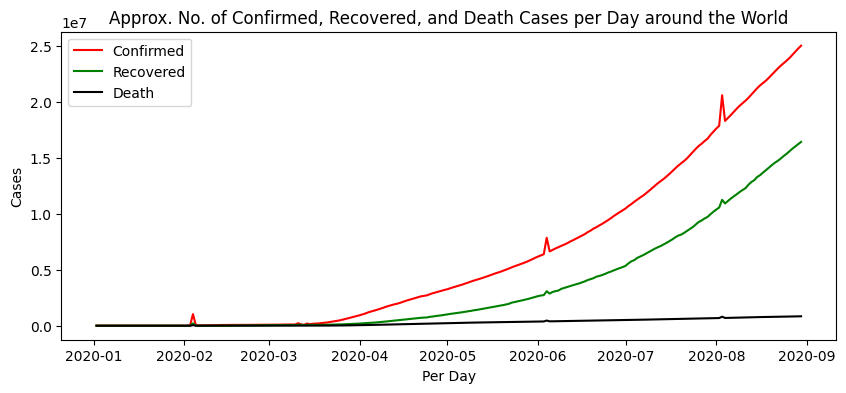

In [17]:
# Visualizing the Approx. no. Confirmed, Recoverd, and Deaths Cases per Day around the world
plt.figure(figsize = (10,4))
plt.plot(confirm_per_day, color = 'Red')
plt.plot(recover_per_day, color = 'Green')
plt.plot(death_per_day, color = 'Black')
plt.xlabel('Per Day')
plt.ylabel('Cases')
plt.legend(['Confirmed', 'Recovered', 'Death'], loc = 'best')
plt.title('Approx. No. of Confirmed, Recovered, and Death Cases per Day around the World')

In [18]:
# Approx. no. of Confirmed cases per hour around the world
confirm_per_hour = data.groupby(data['Last Update_Hour'])['Confirmed'].sum()
# confirm_per_hour

In [19]:
# Approx. no. of Recovered cases per hour around the world
recover_per_hour = data.groupby(data['Last Update_Hour'])['Recovered'].sum()
# recover_per_hour

In [20]:
# Approx. no. of Death cases per hour around the world
death_per_hour = data.groupby(data['Last Update_Hour'])['Deaths'].sum()
# death_per_hour

Text(0.5, 1.0, 'Approx. No. of Confirmed, Recoverd, and Death Cases per Hour around the World')

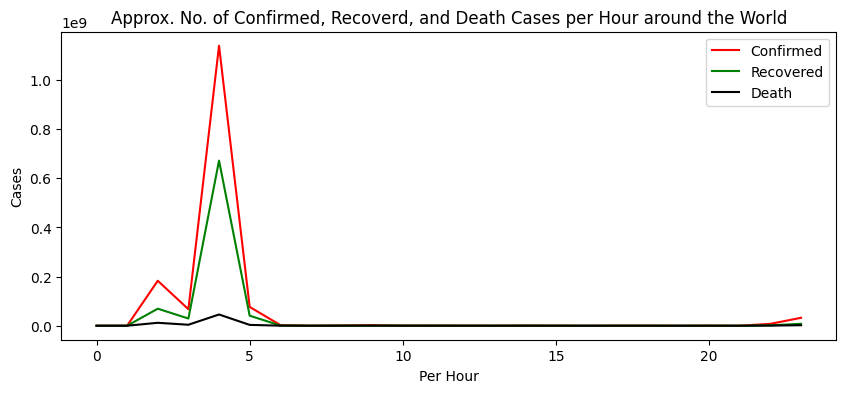

In [21]:
# Visualizing the Approx. no. Confirmed, Recoverd, and Deaths Cases per Hour around the world
plt.figure(figsize = (10, 4))
plt.plot(confirm_per_hour, color = 'Red')
plt.plot(recover_per_hour, color = 'Green')
plt.plot(death_per_hour, color = 'Black')
plt.xlabel('Per Hour')
plt.ylabel('Cases')
plt.legend(['Confirmed', 'Recovered', 'Death'], loc = 'best')
plt.title('Approx. No. of Confirmed, Recoverd, and Death Cases per Hour around the World')

In [25]:
# No. of Confirmed Cases in 24 Hour
# start_date_confirm = data.loc[(data['Last Update_Date'] == '2020-01-22')]
# end_date_confirm = data.loc[(data['Last Update_Date'] == '2020-01-23')]
# total_confirm_hour = start_date_confirm['Confirmed'].sum() + end_date_confirm['Confirmed'].sum()
total_confirm_hour = data.loc[(data['Last Update_Date'] >= '2020-01-22') & (data['Last Update_Date'] <= '2020-01-23')]
print('There are',total_confirm_hour['Confirmed'].sum(),'confirmed cases in last 24 Hour')

There are 1208.0 confirmed cases in last 24 Hour


In [27]:
# No. of Recoverd Cases in 24 Hour
# start_date_recover = data.loc[(data['Last Update_Date'] == '2020-01-22')]
# end_date_recover = data.loc[(data['Last Update_Date'] == '2020-01-23')]
# total_recover_hour = start_date_recover['Recovered'].sum() + end_date_recover['Recovered'].sum()
total_recover_hour = data.loc[(data['Last Update_Date'] >= '2020-01-22') & (data['Last Update_Date'] <= '2020-01-23')]
print('There are',total_recover_hour['Recovered'].sum(),'recovered cases in last 24 Hour')

There are 58.0 recovered cases in last 24 Hour


In [28]:
# No. of Death Cases in 24 Hour
# start_date_death = data.loc[(data['Last Update_Date'] == '2020-01-22')]
# end_date_death = data.loc[(data['Last Update_Date'] == '2020-01-23')]
# total_death_hour = start_date_death['Deaths'].sum() + end_date_death['Deaths'].sum()
total_death_hour = data.loc[(data['Last Update_Date'] >= '2020-01-22') & (data['Last Update_Date'] <= '2020-01-23')]
print('There are',total_death_hour['Deaths'].sum(),'death cases in last 24 Hour')

There are 35.0 death cases in last 24 Hour


In [29]:
# Top 15 Countries as per no. of Confirmed Cases in Last 24 Hours
data.loc[(data['Last Update_Date'] >= '2020-01-22') & (data['Last Update_Date'] <= '2020-01-23')].groupby('Country/Region')['Confirmed'].sum().sort_values(ascending = False).head(15)

Country/Region
Mainland China    1186.0
Thailand             5.0
Japan                3.0
Macau                3.0
Hong Kong            2.0
South Korea          2.0
Taiwan               2.0
US                   2.0
Vietnam              2.0
Singapore            1.0
Australia            0.0
Brazil               0.0
Colombia             0.0
Malaysia             0.0
Mexico               0.0
Name: Confirmed, dtype: float64

In [30]:
# Top 15 Countries as per no. of Recovered Cases in Last 24 Hours
data.loc[(data['Last Update_Date'] >= '2020-01-22') & (data['Last Update_Date'] <= '2020-01-23')].groupby('Country/Region')['Recovered'].sum().sort_values(ascending = False).head(15)

Country/Region
Mainland China    58.0
Australia          0.0
Brazil             0.0
Colombia           0.0
Hong Kong          0.0
Japan              0.0
Macau              0.0
Malaysia           0.0
Mexico             0.0
Philippines        0.0
Singapore          0.0
South Korea        0.0
Taiwan             0.0
Thailand           0.0
US                 0.0
Name: Recovered, dtype: float64

In [31]:
# Top 15 Countries as per no. of Death Cases in Last 24 Hours
data.loc[(data['Last Update_Date'] >= '2020-01-22') & (data['Last Update_Date'] <= '2020-01-23')].groupby('Country/Region')['Deaths'].sum().sort_values(ascending = False).head(15)

Country/Region
Mainland China    35.0
Australia          0.0
Brazil             0.0
Colombia           0.0
Hong Kong          0.0
Japan              0.0
Macau              0.0
Malaysia           0.0
Mexico             0.0
Philippines        0.0
Singapore          0.0
South Korea        0.0
Taiwan             0.0
Thailand           0.0
US                 0.0
Name: Deaths, dtype: float64

In [32]:
# Making a weekdays column in the DataFrame 0, 1, 2, 3, 4, 5, 6 - (Mon, Tue, Wed, Thurs, Fri, Sat, Sun)
data['weekday'] = data['Last Update_Date'].dt.weekday
data.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Last Update_Date,Last Update_Hour,weekday
84673,84674,2020-11-08,North Carolina,US,2020-08-12 04:27:29,138743.0,2238.0,0.0,2020-08-12,4,2
78218,78219,2020-03-08,Unknown,Austria,2020-08-04 04:41:59,21385.0,718.0,19063.0,2020-08-04,4,1
82222,82223,2020-08-08,Drenthe,Netherlands,2020-08-09 04:34:54,566.0,41.0,0.0,2020-08-09,4,6
89490,89491,2020-08-18,Unknown,South Sudan,2020-08-19 04:27:00,2490.0,47.0,1175.0,2020-08-19,4,2
42617,42618,2020-06-15,Hubei,Mainland China,2020-06-16 04:33:09,68135.0,4512.0,63623.0,2020-06-16,4,1


weekday
0    16050027.0
1    16504181.0
2    16918477.0
3    17463530.0
4    18028383.0
5    18566520.0
6    19125691.0
Name: Confirmed, dtype: float64


Text(0.5, 1.0, 'Weekly Growth of Confirmed Cases in INDIA')

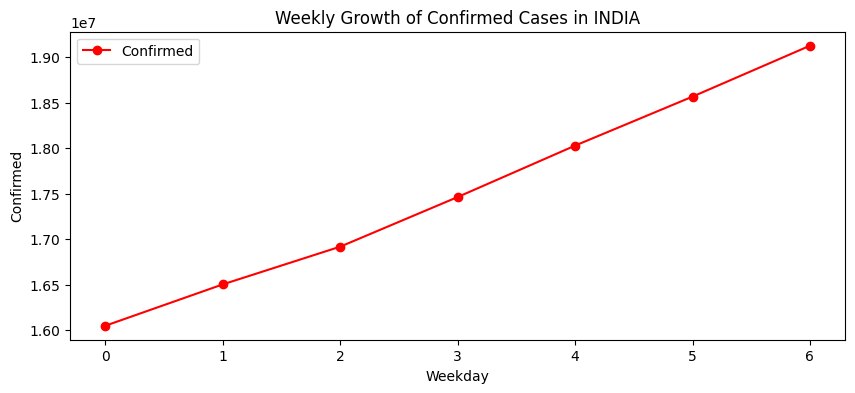

In [33]:
# Weekly growth of different types of cases in India (CONFIRMED)
plt.figure(figsize = (10, 4))
india = data.loc[data['Country/Region'] == 'India']
print(india.groupby(data['weekday'])['Confirmed'].sum())
plt.plot(india.groupby(data['weekday'])['Confirmed'].sum(), color = 'Red', marker = 'o')
plt.xlabel('Weekday')
plt.ylabel('Confirmed')
plt.legend(['Confirmed'], loc = 'best')
plt.title('Weekly Growth of Confirmed Cases in INDIA')

weekday
0    10650949.0
1    11019865.0
2    11360598.0
3    11767569.0
4    12183667.0
5    12586618.0
6    13016289.0
Name: Recovered, dtype: float64


Text(0.5, 1.0, 'Weekly Growth of Recovered Cases in INDIA')

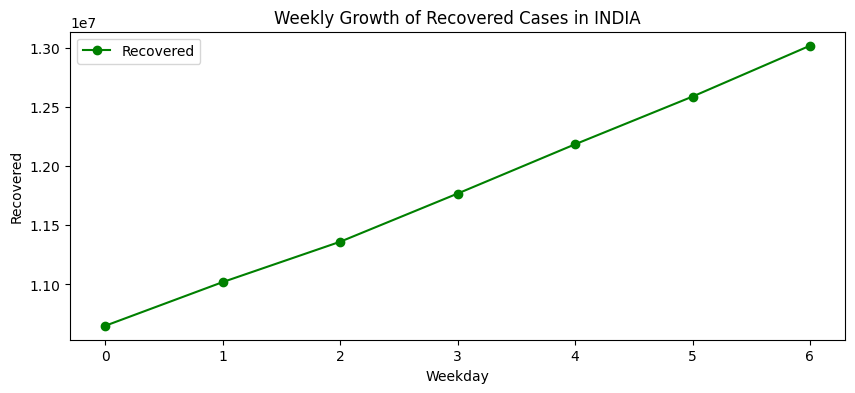

In [34]:
# Weekly growth of different types of cases in India (RECOVERED)
plt.figure(figsize = (10, 4))
india = data.loc[data['Country/Region'] == 'India']
print(india.groupby(data['weekday'])['Recovered'].sum())
plt.plot(india.groupby(data['weekday'])['Recovered'].sum(), color = 'Green', marker = 'o')
plt.xlabel('Weekday')
plt.ylabel('Recovered')
plt.legend(['Recovered'], loc = 'best')
plt.title('Weekly Growth of Recovered Cases in INDIA')

weekday
0    358688.0
1    367078.0
2    376699.0
3    385945.0
4    396013.0
5    404946.0
6    414087.0
Name: Deaths, dtype: float64


Text(0.5, 1.0, 'Weekly Growth of Deaths Cases in INDIA')

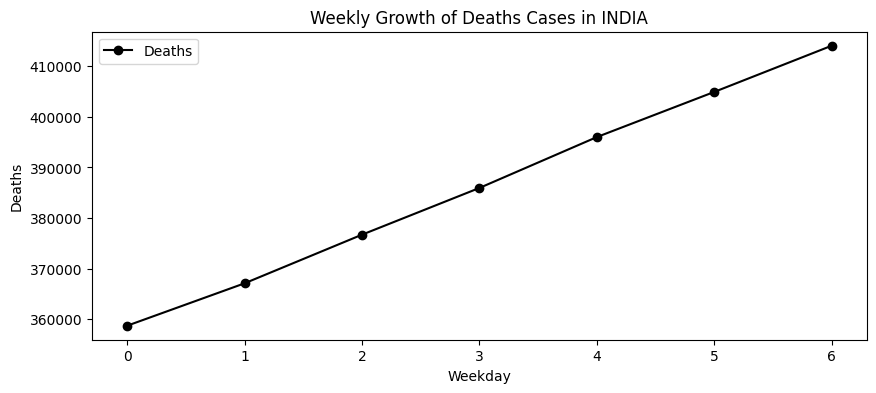

In [35]:
# Weekly growth of different types of cases in India (DEATHS)
plt.figure(figsize = (10, 4))
india = data.loc[data['Country/Region'] == 'India']
print(india.groupby(data['weekday'])['Deaths'].sum())
plt.plot(india.groupby(data['weekday'])['Deaths'].sum(), color = 'Black', marker = 'o')
plt.xlabel('Weekday')
plt.ylabel('Deaths')
plt.legend(['Deaths'], loc = 'best')
plt.title('Weekly Growth of Deaths Cases in INDIA')

In [36]:
# 7 Days rolling mean of daily increase of Confirmed, Recovered and Death Cases
week_data = data.groupby(data['weekday']).sum()
print('The Mean of 7 Days in Confirmed, Recovered and Death Cases :',round(week_data.mean()['Confirmed'], 0),',',round(week_data.mean()['Recovered'], 0),',',round(week_data.mean()['Deaths'], 0))

The Mean of 7 Days in Confirmed, Recovered and Death Cases : 216753839.0 , 117801641.0 , 9719962.0


In [37]:
# Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate
country = data.groupby(data['Country/Region']).sum()

print('There are',country.loc[(country['Confirmed'] > 100) & (country['Deaths'] == 0)]['SNo'].count(),'countries with more than 100 Confirmed Cases and No Deaths')
country.loc[(country['Confirmed'] > 100) & (country['Deaths'] == 0)]

There are 17 countries with more than 100 Confirmed Cases and No Deaths


,SNo,Confirmed,Deaths,Recovered,Last Update_Hour,weekday
Country/Region,,,,,,
Bhutan,7251693,9320.0,0.0,6199.0,1336,532
Cambodia,7316256,25630.0,0.0,21357.0,1572,628
Dominica,7167098,2667.0,0.0,2253.0,1051,470
Eritrea,7175654,21415.0,0.0,13921.0,1072,475
French Guiana,78532,117.0,0.0,6.0,128,46
Grenada,7170048,3256.0,0.0,2620.0,1051,470
Guadeloupe,57307,187.0,0.0,0.0,110,25
Holy See,7243661,1748.0,0.0,1138.0,1304,507
Laos,7158244,2921.0,0.0,2181.0,1023,470
